In [1]:
%pwd

'/home/xupb/scRNA_data/mouse_pfc/manuscripts/scanpy'

In [9]:
#Run the below code in your notebook to check the installed version
import pandas as pd
from pycaret.utils import version
version()
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import column_or_1d
from pycaret.classification import *


1.0.0


In [3]:
data=pd.read_csv('/home/xupb/scRNA_data/mouse_pfc/manuscripts/barcode_projection/random_150_DMS_valid_binary_normdata.csv',index_col=0)

In [4]:
data['binary'].value_counts()

DMS_valid    1802
Others       1754
Name: binary, dtype: int64

In [5]:
data.head()

,Nckap1l,Sar1b,Cebpg,Eif2d,Nmt1,Tcta,Gm26619,Gm4779,Tmem129,Rnf144a,...,Gm48420,Dnaja2,Gm15063,Tesc,Pcyt2,Abcf2,Aldh3a2,Gm17056,Arrb1,binary
pfc_1_AAACCCAAGTCGTTAC,0.0,1.147602,2.008468,1.147602,1.667945,0.000000,0.0,0.0,0.0,0.000000,...,0.0,2.632161,0.0,2.008468,2.008468,1.147602,0.000000,1.147602,0.000000,DMS_valid
pfc_1_AAAGGGCGTGGCATCC,0.0,0.000000,1.411504,0.000000,1.974670,0.000000,0.0,0.0,0.0,0.000000,...,0.0,2.332762,0.0,2.332762,0.000000,1.974670,0.000000,0.000000,1.974670,Others
pfc_1_AACCCAATCCGCTTAC,0.0,0.000000,1.034382,1.531852,1.034382,0.000000,0.0,0.0,0.0,1.531852,...,0.0,1.531852,0.0,1.034382,1.034382,1.531852,1.531852,0.000000,2.110634,Others
pfc_1_AAGAACAAGAGAGCCT,0.0,1.996056,1.137830,1.137830,1.137830,1.137830,0.0,0.0,0.0,0.000000,...,0.0,2.618851,0.0,2.888143,0.000000,1.656318,1.137830,0.000000,1.137830,DMS_valid
pfc_1_ACAAGCTCAAAGCACG,0.0,0.818405,0.000000,0.000000,1.262363,1.262363,0.0,0.0,0.0,1.568750,...,0.0,2.151912,0.0,1.568750,0.818405,1.568750,0.000000,1.262363,1.568750,DMS_valid


In [6]:
df=shuffle(data,random_state=20)
df.head()

,Nckap1l,Sar1b,Cebpg,Eif2d,Nmt1,Tcta,Gm26619,Gm4779,Tmem129,Rnf144a,...,Gm48420,Dnaja2,Gm15063,Tesc,Pcyt2,Abcf2,Aldh3a2,Gm17056,Arrb1,binary
pfc_2_GACCGTGTCATGTCTT,0.0,1.459554,0.975321,0.975321,1.784409,1.459554,0.0,0.00000,1.784409,0.975321,...,0.0,2.530846,0.0,0.975321,1.784409,0.975321,0.000000,0.000000,1.459554,Others
pfc_3_CTACAGAGTAGGAGTC,0.0,1.120690,0.000000,1.635873,2.226555,0.000000,0.0,1.12069,0.000000,0.000000,...,0.0,3.075915,0.0,0.000000,0.000000,0.000000,1.120690,0.000000,0.000000,Others
pfc_4_GGTTAACAGAGAGGTA,0.0,1.956031,0.000000,0.000000,2.664213,1.232117,0.0,0.00000,0.000000,0.000000,...,0.0,2.664213,0.0,0.794910,1.767631,1.232117,0.794910,0.000000,0.794910,Others
pfc_2_TAGCACAGTCCGGTCA,0.0,0.941346,0.000000,0.941346,1.417516,0.000000,0.0,0.00000,0.941346,0.000000,...,0.0,2.339936,0.0,1.738760,0.000000,1.417516,1.417516,0.000000,0.000000,DMS_valid
pfc_2_AGGTTGTAGGTCCTGC,0.0,1.390411,1.950613,1.390411,1.950613,0.919585,0.0,0.00000,0.000000,0.919585,...,0.0,1.709238,0.0,1.390411,1.390411,0.919585,0.919585,0.919585,1.709238,DMS_valid


In [7]:
df['binary']=pd.factorize(df['binary'])[0]

In [8]:
df.head()

,Nckap1l,Sar1b,Cebpg,Eif2d,Nmt1,Tcta,Gm26619,Gm4779,Tmem129,Rnf144a,...,Gm48420,Dnaja2,Gm15063,Tesc,Pcyt2,Abcf2,Aldh3a2,Gm17056,Arrb1,binary
pfc_2_GACCGTGTCATGTCTT,0.0,1.459554,0.975321,0.975321,1.784409,1.459554,0.0,0.00000,1.784409,0.975321,...,0.0,2.530846,0.0,0.975321,1.784409,0.975321,0.000000,0.000000,1.459554,0
pfc_3_CTACAGAGTAGGAGTC,0.0,1.120690,0.000000,1.635873,2.226555,0.000000,0.0,1.12069,0.000000,0.000000,...,0.0,3.075915,0.0,0.000000,0.000000,0.000000,1.120690,0.000000,0.000000,0
pfc_4_GGTTAACAGAGAGGTA,0.0,1.956031,0.000000,0.000000,2.664213,1.232117,0.0,0.00000,0.000000,0.000000,...,0.0,2.664213,0.0,0.794910,1.767631,1.232117,0.794910,0.000000,0.794910,0
pfc_2_TAGCACAGTCCGGTCA,0.0,0.941346,0.000000,0.941346,1.417516,0.000000,0.0,0.00000,0.941346,0.000000,...,0.0,2.339936,0.0,1.738760,0.000000,1.417516,1.417516,0.000000,0.000000,1
pfc_2_AGGTTGTAGGTCCTGC,0.0,1.390411,1.950613,1.390411,1.950613,0.919585,0.0,0.00000,0.000000,0.919585,...,0.0,1.709238,0.0,1.390411,1.390411,0.919585,0.919585,0.919585,1.709238,1


In [10]:
exp1 = setup(df, target = 'binary',session_id=1)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(3556, 151)"
4,Missing Values,False
5,Numeric Features,150
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [13]:
tuned_xgboost = tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7912,0.8515,0.8730,0.7534,0.8088,0.5815
1,0.7912,0.8206,0.8175,0.7803,0.7984,0.5820
2,0.8072,0.8600,0.8413,0.7910,0.8154,0.6141
3,0.8755,0.9195,0.9365,0.8369,0.8839,0.7506
4,0.8032,0.8484,0.8810,0.7655,0.8192,0.6056
5,0.7470,0.8139,0.8333,0.7143,0.7692,0.4929
6,0.7751,0.8249,0.8413,0.7465,0.7910,0.5494
7,0.7791,0.8320,0.8492,0.7483,0.7955,0.5574
8,0.8153,0.8406,0.8819,0.7832,0.8296,0.6294
9,0.7702,0.8247,0.8095,0.7556,0.7816,0.5397


In [11]:
save_experiment('Experiment_DMS_random_19July2020')

Experiment Succesfully Saved


NameError: name 'clear_output' is not defined

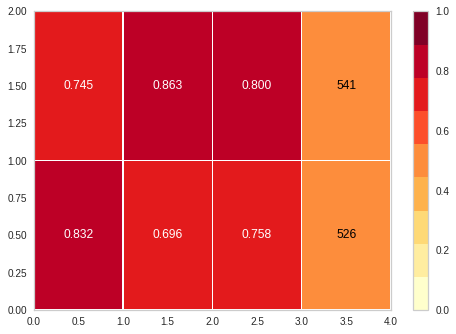

In [14]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(tuned_xgboost, random_state=1, support='count')
visualizer.fit(exp1[2], exp1[4])
visualizer.score(exp1[3], exp1[5])
clear_output()

#visualizer.show(outpath="DMS var model classification report.pdf")

In [24]:
from sklearn.model_selection import train_test_split
from pycaret import preprocess
from sklearn import metrics

X = exp1[3]
y = exp1[5]

# Number of random trials
NUM_TRIALS = 10
d = []
for i in range(NUM_TRIALS):
    
    X_train, X_test, y_train, y_test  = train_test_split(X, y,stratify=y, test_size=0.9,  random_state=i)
    pred_ =tuned_xgboost.predict(X_test)
    pred_prob = tuned_xgboost.predict_proba(X_test)[:,1]
    acc = metrics.accuracy_score(y_test,pred_)
    auc = metrics.roc_auc_score(y_test,pred_prob)
    prec = metrics.precision_score(y_test,pred_)
    f1 = metrics.f1_score(y_test,pred_)
    recall = metrics.recall_score(y_test,pred_)
    kappa = metrics.cohen_kappa_score(y_test,pred_)
    d.append(
        {
           'Accuracy' : acc, 'AUC': auc, 'F1' : f1, 'Precision':prec, 'Recall':recall, 'Kappa':kappa
        }
    )
    model_results=pd.DataFrame(d)


In [25]:
model_results

,AUC,Accuracy,F1,Kappa,Precision,Recall
0,0.819038,0.778356,0.798104,0.555617,0.741197,0.864476
1,0.822975,0.779396,0.798095,0.557766,0.744227,0.860370
2,0.823469,0.777315,0.795802,0.553619,0.743316,0.856263
3,0.817331,0.777315,0.796964,0.553543,0.740741,0.862423
4,0.826272,0.782518,0.800000,0.564085,0.749104,0.858316
5,0.819739,0.778356,0.797721,0.555642,0.742049,0.862423
6,0.833866,0.783559,0.800766,0.566183,0.750449,0.858316
7,0.825219,0.781478,0.799618,0.561963,0.746881,0.860370
8,0.828317,0.784599,0.803791,0.568135,0.746479,0.870637
9,0.819536,0.774194,0.793922,0.547297,0.738516,0.858316
